<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Spatial_GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km.csv")

In [6]:
processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
0,0,287,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,...,1557.17,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753
1,1,1125,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,...,1507.68,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415
2,2,1963,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,...,1814.58,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645
3,3,2801,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,...,3233.08,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260
4,4,3639,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,...,3829.11,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,83575,79997,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,...,1735.93,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807
83576,83576,80835,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,...,1694.04,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549
83577,83577,81673,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,...,1555.81,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490
83578,83578,82511,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,...,1414.49,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758


In [7]:
import networkx as nx
from geopy.distance import geodesic

In [8]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16798,16798,82962,0,202308,36.831,2.695,299.798,292.088,308.027,292.618,...,2353.40,1375.94,300.270,0.000044,-3.007470,-2.283540,2023-08-01,2023,8,0.100696
18598,18598,82963,1,202308,36.831,4.492,298.952,290.859,308.724,290.093,...,2415.50,1451.00,299.869,0.000031,-2.610690,-1.962180,2023-08-01,2023,8,0.165674
20498,20498,82964,2,202308,36.831,6.288,299.179,290.378,310.346,290.137,...,2602.52,1682.16,299.597,0.000027,-2.657440,-1.154330,2023-08-01,2023,8,0.158589
22398,22398,82965,3,202308,36.831,8.085,299.810,291.612,314.138,290.430,...,2247.70,1509.14,299.815,0.000023,-1.496310,-1.311100,2023-08-01,2023,8,0.162999


In [ ]:
ten_month_dataset = sort_processed_dataset[sort_processed_dataset["Month"].isin([202308, 202307, 202306, 202305, 202304])]

In [ ]:
ten_month_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
95,79897,287,202304,-17.068,15.271,296.765,291.440,307.142,289.853,0.000508,...,1881.11,1320.460,303.146,4.255520e-08,-2.312700,-2.053750,2023-04-01,2023,4,0.103913
195,79963,353,202304,-15.271,11.678,302.095,296.218,311.455,292.444,0.000046,...,4943.03,2807.060,304.280,2.678910e-07,-2.006740,-1.841320,2023-04-01,2023,4,0.304030
295,79930,320,202304,-15.271,13.475,303.314,294.034,314.312,286.329,0.000120,...,3004.12,1904.160,307.381,3.829220e-08,-2.085040,-1.926780,2023-04-01,2023,4,0.098427
395,79898,288,202304,-15.271,15.271,303.348,292.661,315.887,282.490,0.000767,...,2019.48,1454.310,307.851,1.130970e-08,-2.158050,-2.012000,2023-04-01,2023,4,0.031887
495,79865,255,202304,-15.271,17.068,302.457,290.877,316.708,280.865,0.000970,...,1726.87,1215.730,307.306,5.249290e-09,-2.098750,-2.012650,2023-04-01,2023,4,0.036777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83179,83421,459,202308,49.407,8.085,301.267,295.332,308.758,289.434,0.000062,...,1489.86,1084.490,302.024,6.550340e-07,-1.878460,-1.617230,2023-08-01,2023,8,0.091263
83279,83385,423,202308,49.407,9.881,300.419,294.015,306.637,286.041,0.000321,...,1403.91,1038.670,302.655,5.138590e-07,1.622190,1.952580,2023-08-01,2023,8,0.099182
83379,83348,386,202308,49.407,11.678,306.196,300.897,311.153,289.675,0.000099,...,1650.33,1187.100,305.441,1.044440e-06,4.448400,4.509740,2023-08-01,2023,8,0.146285
83479,83386,424,202308,51.204,9.881,300.222,296.370,305.795,291.744,0.000023,...,1162.77,898.003,302.263,7.311530e-08,0.581537,0.897131,2023-08-01,2023,8,0.159424


In [15]:
dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == 201505]

In [16]:
dataset_subset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am
36896,36896,832,832,201505,-33.238,18.865,288.610,280.177,303.344,282.436,...,3183.19,1579.13,284.951,0.000036,-0.646173,-1.422560,2015-05-01,2015,5,0.251283
40496,40496,833,833,201505,-33.238,20.661,286.602,277.234,299.677,276.598,...,2342.47,1065.27,283.865,0.000017,-0.060123,-0.716875,2015-05-01,2015,5,0.208038
44196,44196,834,834,201505,-33.238,22.458,287.657,277.419,300.492,277.622,...,2539.90,1144.62,284.058,0.000023,-0.395736,-0.197511,2015-05-01,2015,5,0.236802
47996,47996,835,835,201505,-33.238,24.255,288.242,279.026,302.691,278.494,...,3223.51,1457.66,284.624,0.000024,-0.034155,1.049300,2015-05-01,2015,5,0.201857
51696,51696,836,836,201505,-33.238,26.051,288.644,279.236,303.139,281.658,...,5622.32,2827.40,287.150,0.000034,-0.772399,0.596915,2015-05-01,2015,5,0.235473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16699,16699,0,0,201505,36.831,2.695,292.897,284.173,306.818,286.393,...,3372.96,2213.50,296.440,0.000012,-1.691230,-1.961670,2015-05-01,2015,5,0.116577
18499,18499,1,1,201505,36.831,4.492,291.509,281.289,307.803,284.749,...,3204.50,2178.00,296.346,0.000011,-1.675480,-1.874810,2015-05-01,2015,5,0.188295
20399,20399,2,2,201505,36.831,6.288,291.982,280.979,310.320,285.078,...,3771.80,2545.19,295.924,0.000008,-1.147220,-1.466250,2015-05-01,2015,5,0.164540
22299,22299,3,3,201505,36.831,8.085,292.651,282.872,311.148,285.349,...,3253.83,2270.80,296.594,0.000002,-0.818641,-1.169820,2015-05-01,2015,5,0.166775


In [30]:
Spatial_subset_graph = nx.Graph()

In [31]:
dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

In [32]:
# Add nodes with features
for index, row in dataset_subset.iterrows():
    Spatial_subset_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [34]:
curLon = 0
curLat = 0
prevNode = 0

#Add east-west edges
dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

for i, row_i in dataset_subset.iterrows():
  if curLat == row_i["Lat"]:
    Spatial_subset_graph.add_edge(prevNode, i)
    prevNode = i
  else:
    curLat = row_i["Lat"]
    prevNode = i

#Add north-south edges
dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])

for i, row_i in dataset_subset.iterrows():
  if curLat == row_i["Lon"]:
    Spatial_subset_graph.add_edge(prevNode, i)
    prevNode = i
  else:
    curLat = row_i["Lon"]
    prevNode = i


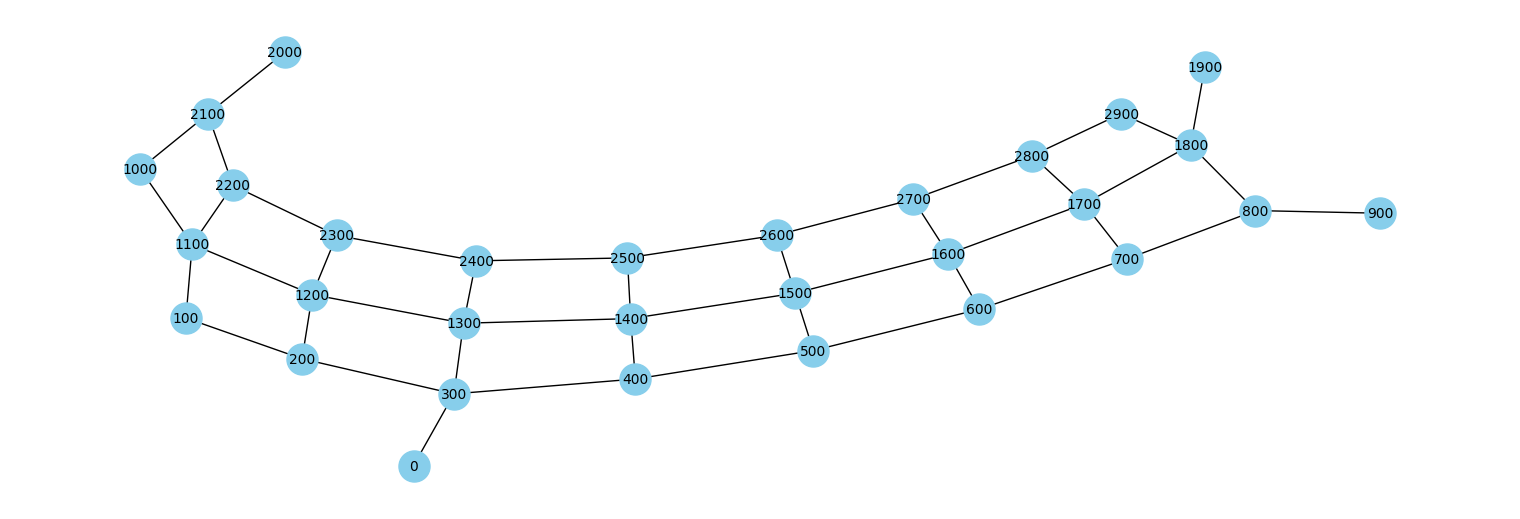

In [39]:
display_a_to_b_nodes(Spatial_subset_graph, 0, 30)

**Spatial-Temporal Graph**

In [12]:
Spatial_temporal_graph = nx.Graph()

In [13]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[['Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [ ]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months

In [29]:
#Create Spatial Edges
total_index=0

for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  curLon = 0
  curLat = 0
  prevNode = 0

  #Add east-west edges
  dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

  for i, row_i in dataset_subset.iterrows():
    if curLat == row_i["Lat"]:
      Spatial_temporal_graph.add_edge(prevNode, i+total_index)
      prevNode = i+total_index
    else:
      curLat = row_i["Lat"]
      prevNode = i+total_index

  #Add north-south edges
  dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])

  for i, row_i in dataset_subset.iterrows():
    if curLat == row_i["Lon"]:
      Spatial_temporal_graph.add_edge(prevNode, i+total_index)
      prevNode = i+total_index
    else:
      curLat = row_i["Lon"]
      prevNode = i+total_index

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


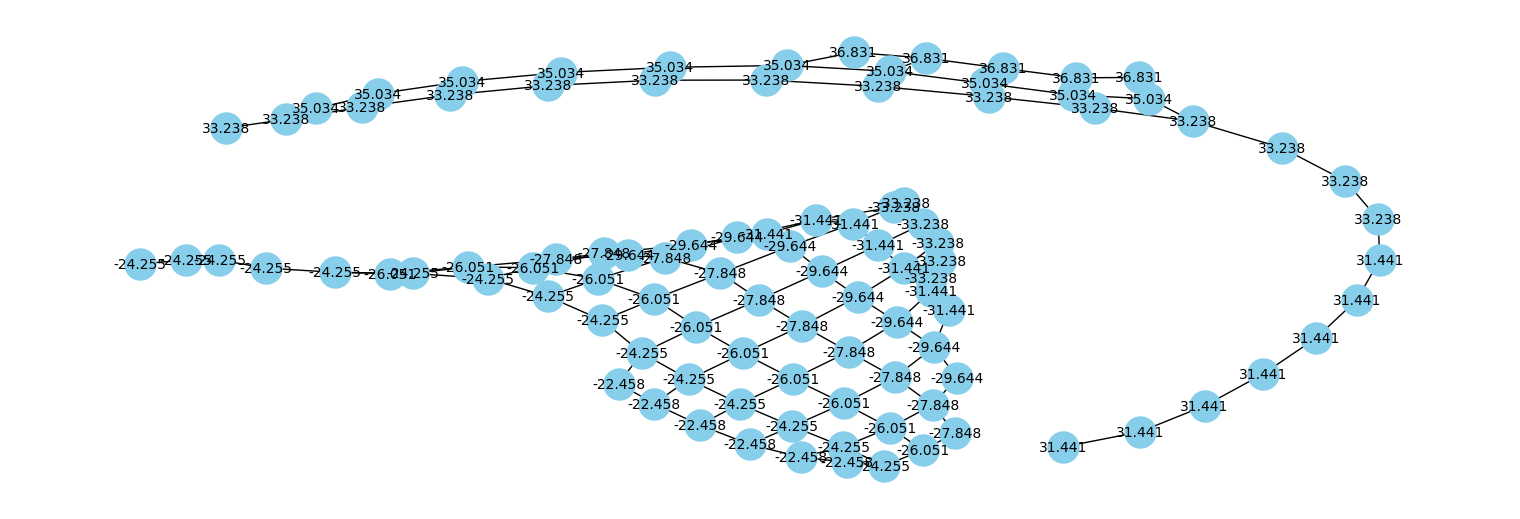

In [98]:
display_a_to_b_nodes(Spatial_temporal_graph, 800, 900, "Lat")

In [102]:
#Create Temporal Edges
total_index=0

for i, month in enumerate(unique_list_of_months[:-2]):
  dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]
  dataset_subset_3 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+2]]

  for i, row_i in dataset_subset_1.iterrows():
    Spatial_temporal_graph.add_edge(i+total_index, i+total_index+)
    total_index = total_index+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


**Graph Display**

In [33]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

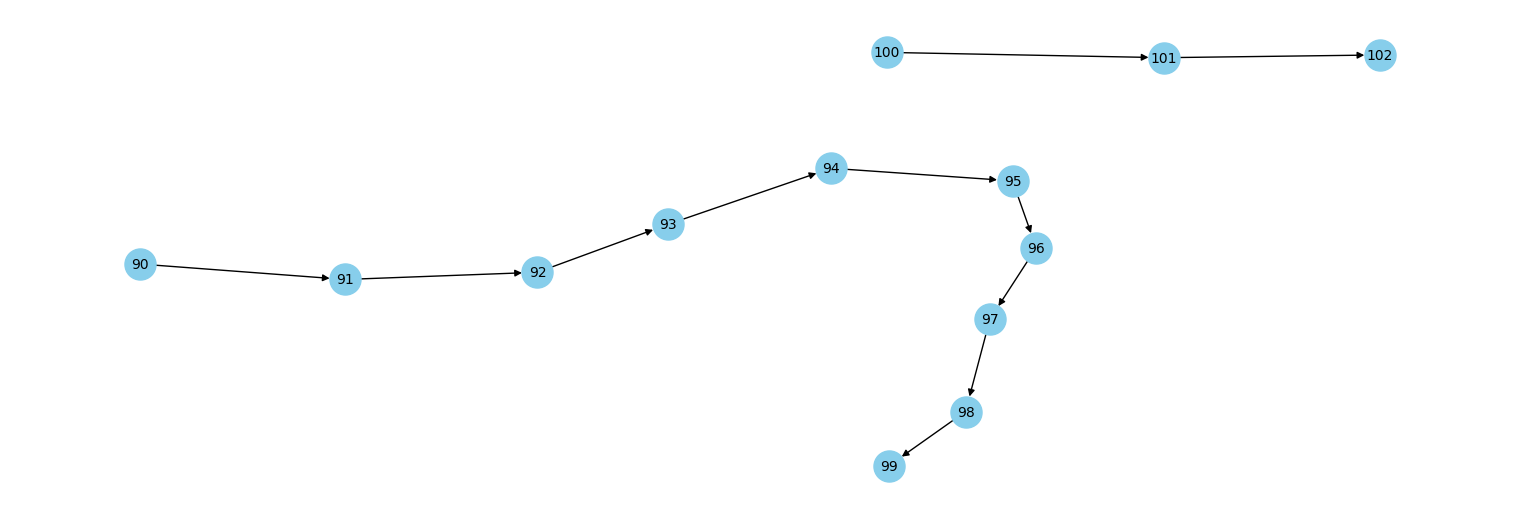

In [ ]:
display_a_to_b_nodes(Temporal_graph, 90, 103)

In [ ]:
#Access node attibutes for the 80th node
Temporal_graph.nodes[list(Temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/